In [2]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [3]:
#24 sites
file_name = '2023_02_09*L24.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23/'+file_name))
data_path

['C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_04_424L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_04_576L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_04_940L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_05_415L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_05_721L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_513L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_543L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_561L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_598L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_708L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_10_23\\2023_02_09_11_49_06_797L24.npy',

In [4]:
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [5]:
selected_data = []
for i in range(len(data)):
    if data[i]['params']['Omega']== 1.5 and len(data[i]['nT'])==146: #and np.array(data[i]['nT'])[:,3][-1]>4.5:
        selected_data.append(data[i])
# # del selected_data[1] #get rid of the uncompleted data
# # del selected_data[-1] #get rid of the uncompleted data

selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['Delta_crit'])   # sort by age

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('Delta_crit',selected_data[i]['params']['Delta_crit'])
    print(zzg_list[i].shape)
    print(t[i].shape)

i 0
Delta_crit 0.0
(146, 24, 24)
(146,)
i 1
Delta_crit 0.4
(146, 24, 24)
(146,)
i 2
Delta_crit 0.6
(146, 24, 24)
(146,)
i 3
Delta_crit 0.8
(146, 24, 24)
(146,)
i 4
Delta_crit 1.0
(146, 24, 24)
(146,)
i 5
Delta_crit 1.2
(146, 24, 24)
(146,)
i 6
Delta_crit 1.34
(146, 24, 24)
(146,)
i 7
Delta_crit 1.44
(146, 24, 24)
(146,)
i 8
Delta_crit 1.54
(146, 24, 24)
(146,)
i 9
Delta_crit 1.62
(146, 24, 24)
(146,)
i 10
Delta_crit 1.74
(146, 24, 24)
(146,)
i 11
Delta_crit 1.8
(146, 24, 24)
(146,)
i 12
Delta_crit 1.85
(146, 24, 24)
(146,)
i 13
Delta_crit 2.0
(146, 24, 24)
(146,)
i 14
Delta_crit 2.4
(146, 24, 24)
(146,)


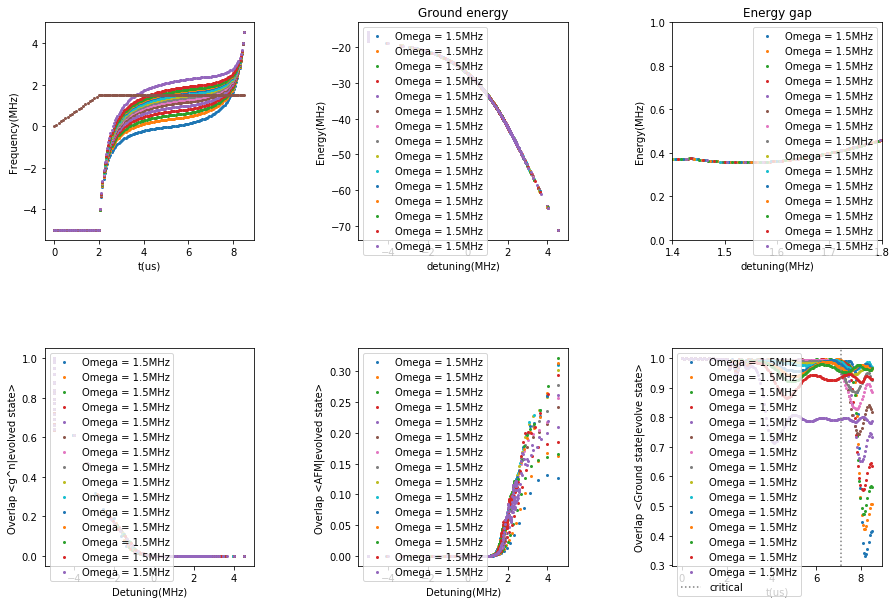

In [17]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown','black']
for i in range(len(N)):
    label0 ='Omega = '+ str((selected_data[i]['params']['Omega']))+'MHz'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 )
   # print(np.array([t[i],detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    #print(np.array([detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0)
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

ax[0,2].set_xlim([1.4,1.8])
#ax[0,2].set_ylim([0.35,0.4])



ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
#ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].set_ylim([0,1])
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



i = 0
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  134
crit_t7.9279999999999715
crit_detuning1.549501529323967
crit_gap0.35517384279995384
final_detuning4.5399999999996
final_gap2.9724453889689
i = 1
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  132
crit_t7.823999999999972
crit_detuning1.5245984857235424
crit_gap0.3552548663283106
final_detuning4.5399999999996
final_gap2.972445388974247
i = 2
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  131
crit_t7.771999999999973
crit_detuning1.5458800293683448
crit_gap0.355047812833208
final_detuning4.5399999999996
final_gap2.972445388968955
i = 3
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  129
crit_t7.6679999999999735
crit_detuning1.5298839088248115
crit_gap0.3550519812316014
final_detuning4.5399999999996
final_gap2.972445388970755
i = 4
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  127
crit_t7.563999999999974
crit_detunin

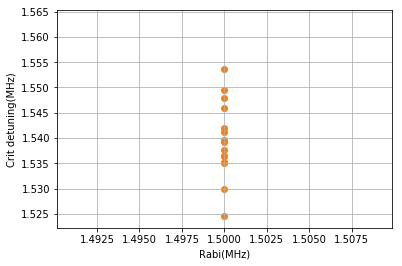

In [7]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 ='Omega = '+ str(int(selected_data[i]['params']['Omega']))+'MHz'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))
    plt.scatter(selected_data[i]['params']['Omega'],detuning[i][crit_id],color = 'C1')
plt.xlabel('Rabi(MHz)')
plt.ylabel('Crit detuning(MHz)')
plt.grid(which = 'both')
          
    

In [8]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    print(i)
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)

sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


1.34MHz 1.4007718991861617 [ 0.12653748 -0.49199271]
1.34MHz 1.4127722760282884 [ 0.12532819 -0.47823834]
1.34MHz 1.4253789583149874 [ 0.12340429 -0.46197955]
1.34MHz 1.4386390862423037 [ 0.12162392 -0.44573452]
1.34MHz 1.452604816888574 [ 0.12068142 -0.43130156]
1.34MHz 1.4673340098571441 [ 0.12158492 -0.42068023]
1.34MHz 1.4828910285247463 [ 0.12409572 -0.41170281]
1.34MHz 1.4993476802939179 [ 0.12818127 -0.40285937]
1.34MHz 1.516784324821383 [ 0.13272077 -0.3912689 ]
1.34MHz 1.5352911863071552 [ 0.13678867 -0.37584629]
1.34MHz 1.5549699150688068 [ 0.13964288 -0.35702464]
1.34MHz 1.575935455454416 [ 0.14076116 -0.33540641]
1.34MHz 1.5983182925752613 [ 0.14099484 -0.31356582]
1.34MHz 1.6222671706242284 [ 0.14102676 -0.29235193]
1.34MHz 1.6479524024489338 [ 0.14235047 -0.27327575]
1.34MHz 1.675569926059242 [ 0.14540363 -0.25560832]
1.34MHz 1.70534631242677 [ 0.14986002 -0.23840028]
1.34MHz 1.7375449954316067 [ 0.15487788 -0.22077857]
1.34MHz 1.7724740866842212 [ 0.1590928  -0.20206556]

1.74MHz 1.6060568116310445 [ 0.14473601 -0.14628682]
1.74MHz 1.6143392663560512 [ 0.14666567 -0.13517543]
1.74MHz 1.6224049906987033 [ 0.14890056 -0.12458813]
1.74MHz 1.6302623817034685 [ 0.15075037 -0.11393482]
1.74MHz 1.6379194081632495 [ 0.15169275 -0.10340714]
1.74MHz 1.64538363757686 [ 0.1519696  -0.09402343]
1.74MHz 1.6526622610955188 [ 0.15209869 -0.08629461]
1.74MHz 1.6597621166312382 [ 0.15262546 -0.08087292]
1.74MHz 1.6666897102831943 [ 0.15386868 -0.07753017]
1.74MHz 1.6734512362232 [ 0.15547082 -0.07591474]
1.74MHz 1.6800525951680445 [ 0.15686706 -0.07508384]
1.74MHz 1.6864994115544714 [ 0.15733445 -0.07393463]
1.74MHz 1.6927970495218827 [ 0.15676789 -0.07235242]
1.74MHz 1.6989506277982225 [ 0.15557219 -0.07027745]
1.74MHz 1.7049650335758524 [ 0.15444773 -0.06869877]
1.74MHz 1.7108449354564912 [ 0.1541581  -0.06818004]
1.74MHz 1.716594795537264 [ 0.15494847 -0.06902484]
1.74MHz 1.7222188807036298 [ 0.15683335 -0.07113371]
1.74MHz 1.7277212731892466 [ 0.1593093  -0.07348961]

Text(0.53, 1.05, '6.5us Dilila ramp,Rabi = 1.5MHz')

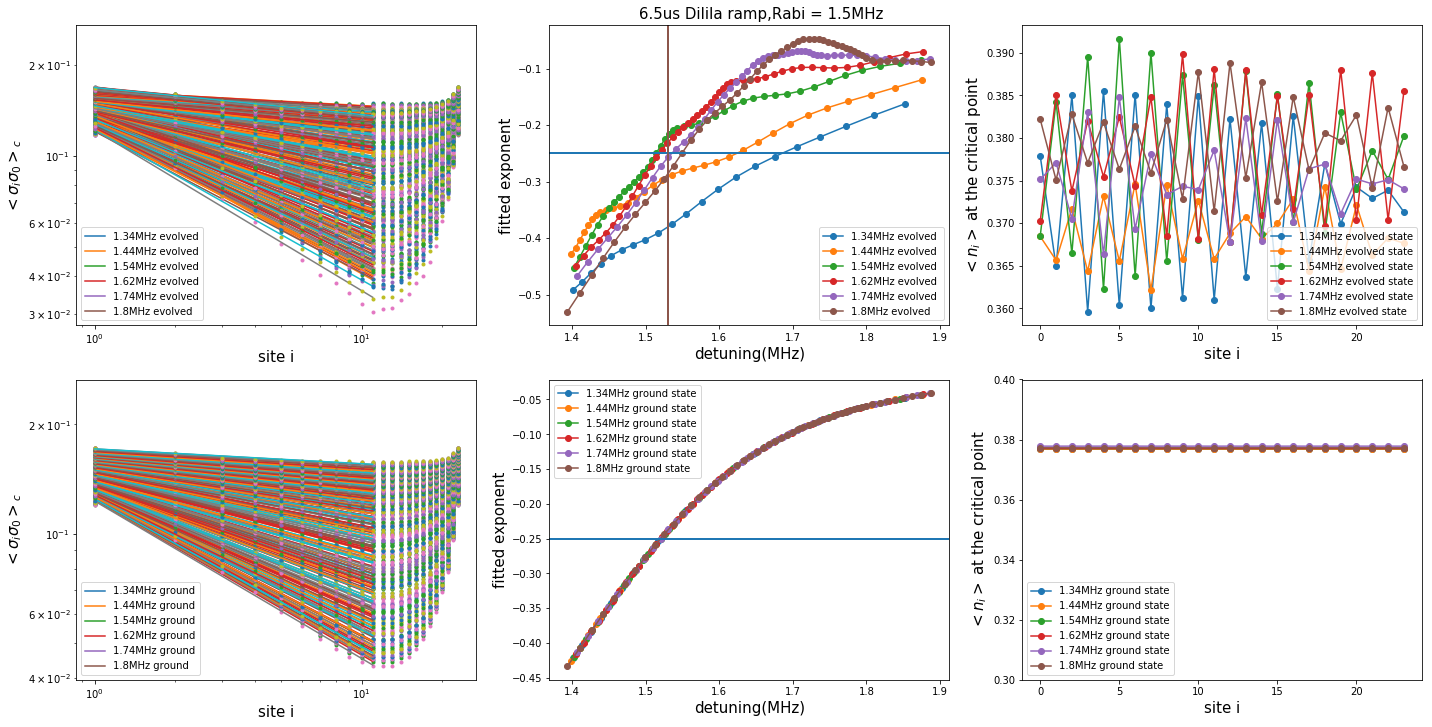

In [9]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning =1.4
final_detuning = 1.9
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(6)):
    i = i+6
    label0 =''+ str((selected_data[i]['params']['Delta_crit']))+'MHz'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '')
#         print('aha',detuning[i][t_id])
#         print(sigma_2_list[i][t_id])
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        #print(sigma_2_list[i][t_id])
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(1.53,color = 'C%d'%i_n)
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-')

        print(label0,detuning[i][t_id],params)

#         if t_id == crit_id_list[i]:
#                 ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
#                 ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
 #   ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
title = str(selected_data[0]['params']['T_DiLILA'])+'us Dilila ramp,'+'Rabi = '+str(selected_data[0]['params']['Omega'])+'MHz'

ax[0,1].set_title(title,fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)


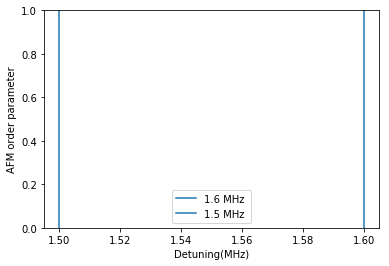

In [10]:
# sampled_x = np.arange(0,2.5,0.1)
# sampled_y = []

# sampled_x = np.array([1,1.5,1.55,1.6,1.65,1.8])
# sampled_y = np.array([0.72,2.35,2.5,2.7,2.87,3.5])
crit_list = []
detuning_list = []
y_list = []
for i_n,i in enumerate(range(len(N))):

    temp = sigma_2_list[i][:,1:]
    print(np.shape(temp))
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    crit_list.append(selected_data[i]['params']['Delta_crit'])
#     if len(y)
    y_list.append(y)
   # print(len(y))
#     interp_func = interp1d(x, y)

#     interp_y = interp_func(sampled_x)
#     sampled_y.append(interp_y)
  #  plt.plot(x,y,marker = '^',markersize = 1, ls ='')
#     plt.plot(sampled_x,interp_y,marker = 'o',markersize = 4,ls ='')
#plt.yscale('log')
plt.axvline(1.6,label = '1.6 MHz')
plt.axvline(1.5,label = '1.5 MHz ')
plt.legend()
plt.ylabel('AFM order parameter')
plt.xlabel('Detuning(MHz)')
y_list = np.array(y_list)
crit_list = np.array(crit_list)
#plt.ylim([0.1,0.8])

1.7689718051725833
0.012951561114193114
[1.76897181 1.01807277 2.8284871  2.3934423 ]


array([0.  , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.34, 1.44, 1.54, 1.62, 1.74,
       1.8 , 1.85, 2.  , 2.4 ])

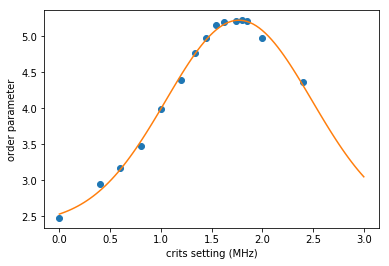

In [15]:
p,perr = curve_fit(fitfuc,crit_list,y_list[:,-1],p0=[1.8,1,2,0])
plt.plot(crit_list,y_list[:,-1],ls = '',marker = 'o')
testx = np.linspace(0,3,100)
testy = fitfuc(testx,*p)
plt.plot(testx,testy)
print(p[0])
print(perr[0,0]**0.5)
print(p)

plt.xlabel('crits setting (MHz)')
plt.ylabel('order parameter')
crit_list

In [12]:
def fitfuc(x,x0,w,A,B):
    return A*np.exp(-(x-x0)**2/(w**2))+B

In [80]:
testx = np.linspace(0,3,100)
testy = fitfuc(testx,1.8,1,2,0)

In [15]:
crit_list

array([0.  , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.34, 1.44, 1.54, 1.62, 1.74,
       1.8 , 1.85, 2.  , 2.4 ])

In [100]:
sigma_2_list[i][-1][1:]

array([0.22400959, 0.2165135 , 0.20950577, 0.20164782, 0.19474238,
       0.18809267, 0.18214621, 0.17666461, 0.17224881, 0.16973241,
       0.16642877, 0.16604617, 0.16636133, 0.16863347, 0.17189814,
       0.17610827, 0.18089147, 0.18737493, 0.19411179, 0.20134704,
       0.208941  , 0.2164766 , 0.22343232])

In [99]:
sigma_2_list[i][-1][:]

array([0.24960157, 0.22400959, 0.2165135 , 0.20950577, 0.20164782,
       0.19474238, 0.18809267, 0.18214621, 0.17666461, 0.17224881,
       0.16973241, 0.16642877, 0.16604617, 0.16636133, 0.16863347,
       0.17189814, 0.17610827, 0.18089147, 0.18737493, 0.19411179,
       0.20134704, 0.208941  , 0.2164766 , 0.22343232])